<a href="https://colab.research.google.com/github/LangLan-Z/TS/blob/main/1_Intro_pennylane_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Pennylane for use in google Colab
try:
    import pennylane as qml
except ImportError:
    print("installing Pennylane...")
    !pip install --quiet pennylane
    print("installed Pennylane.")
    import pennylane as qml
print("Pennylane version:", qml.__version__)

import pennylane as qml
import numpy as np

installing Pennylane...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.0 MB/s eta 0:00:00
installed Pennylane.
Pennylane version: 0.40.0


# Tutorial 1: Introduction to Pennylane

>[Designing and simulating quantum circuits with Pennylane](#designing-and-simulating-quantum-circuits-with-pennylane)

>[Making a circuit](#making-a-circuit)

>>[Quantum functions](#quantum-functions)

>>[Devices](#devices)

>>[QNode](#qnodes)

>[Operations](#operations)

>>[Gates](#gates)

>>[Measurements](#measurements)

>[Parametrizing a quantum circuit](#parametrizing-a-quantum-circuit)

>>[Declaring a parametrized circuit as a function](#declaring-a-parametrized-circuit-as-a-function)

>>[Visualizing the parametrized circuit](#visualizing-the-parametrized-circuit)

>>[Circuits as functions](#circuits-as-functions)

>>[Sweeps](#sweeps)

>[Quantum teleportation](#quantum-teleportation)



# Designing and simulating quantum circuits with Pennylane
In this tutorial we will learn the basics of quantum simulation using Xanadu's Pennylane package.
To install Pennylane on your computer, please see the instructions at https://pennylane.ai/install
If you're running this in Google COLAB, run the first cell of the notebook (above) to install Pennylane.

Today a large amount of high-quality resources are available on the Pennylane website https://pennylane.ai/.
This tutorials are tailored towards the course, and are adapted each year -- but the tutorials and the documentation on Pennylane website are invaluable. This is also true for OpenFermion, or any other package you might want to use...
**Please learn to read the docs!!**

Today's tutorial also takes some inspiration from the Pennylane basics tutorial (https://docs.pennylane.ai/en/stable/, and https://pennylane.ai/codebook)


# Making a circuit
## Quantum functions

A quantum circuit can be represented as a quantum function in Pennylane. It is a Python function that contains a list of gates that may depend on some parameters and act on some wires, i.e. qubits.
In PennyLane, all wires are initialized in the state $|0\rangle$.
Let us build our first quantum circuit with PennyLane.

In [ ]:
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

In this function, we make use of the Rotation gate `qml.RX` which depends on a rotation angle parameter theta, the Pauli-Y gate `qml.PauliY` and the Hadamard gates `qml.Hadamard`.
The wires or qubits are labelled by integers 0, 1, 2, etc., counting from 0 in the Pythonic way.
Thus, the circuit above has two qubits, labelled 0 and 1. We can draw this circuit as follows,

(<Figure size 500x300 with 1 Axes>, <Axes: >)

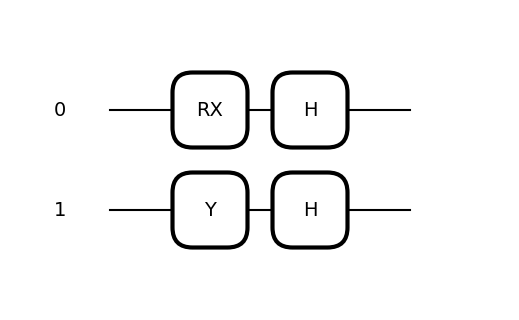

In [ ]:
qml.drawer.use_style("black_white")
qml.drawer.draw_mpl(my_first_quantum_function)(theta=0)

Note that if you run this function, you will not get any answer. This makes sense, since we didn't return anything. But even adding a return statement isn't enough. Let's see what we need to do in the next section.

## Devices
To run `my_first_quantum_function`, we need to return something. One of the return types that PennyLane accepts is `qml.state()`, which returns a complex `np.array` that represents the quantum state after all the gates have been applied. Let's add this to our quantum function.

In [ ]:
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()

my_first_quantum_function(theta=0.1)

state(wires=[])

You may already find that nothing happens again after running the block above.
The reason is that, in PennyLane, we need to specify a **device** on which the quantum circuit will run.
PennyLane offers some basic devices simulators, but we will focus on the following three:
*   `default.qubit`: The default quantum device for circuits without noise. It is not optimized for performance, but it's the first one to be upgraded and will have the most advanced features at any point in time.
*   `lightning.qubit`: A fast noiseless qubit device. It is optimized for performance via a C++ backend, but its development will often lag a bit behind default.qubit.
*   `default.mixed`: A qubit device that allows noisy gates. It works with the density operator representation of quantum states.
*   
We will work with default.qubit unless we say otherwise. For larger circuits with many qubits, working with `lightning.qubit` is highly recommended. Let's define the device using `qml.device`.

In [ ]:
dev = qml.device("default.qubit", wires = 2)

The `wires` argument specifies the number of wires. In the `default.qubit` device, the `wires` argument is optional, since the backend can read our circuit and figure out the number of wires. Now all that is left is to tell PennyLane that we want to use this device `dev` for our quantum function.

## QNodes

**The pairing of a quantum circuit with a device is called a QNode**, which wraps the quantum function and binds it to the device.
There are two ways associate a quantum circuit with a device:

* Explicitly create a QNode with `qml.QNode()`;
* Use the `@qml.qnode` decorator.

For the first way, a QNode can be explicitly created as follows:

In [ ]:
circuit = qml.QNode(my_first_quantum_function, dev)

The QNode can be used to compute the result of a quantum circuit as if it was a standard Python function. It takes the same arguments as the original quantum function:

In [ ]:
circuit(theta=0.1)

array([ 0.02498958+0.49937513j, -0.02498958-0.49937513j,
       -0.02498958+0.49937513j,  0.02498958-0.49937513j])

**The** second way, using QNode decorator, is more convenient—and in fact the recommended—way for creating QNodes. This decorator converts a Python function containing PennyLane quantum operations to a QNode circuit that will run on a quantum device. To do this, we place `@qml.qnode` on top of the definition of our quantum function as follows.

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()


The decorator `@qml.qnode` effectively creates a QNode called `my_first_quantum_function`. We note that the decorator completely replaces the Python-based quantum function with a QNode of the same name —- as such, the original function is no longer accessible.

Running the QNode will give the output state. For example:


In [ ]:
my_first_quantum_function(np.pi/4)

array([ 0.19134172+0.46193977j, -0.19134172-0.46193977j,
       -0.19134172+0.46193977j,  0.19134172-0.46193977j])

# Operations
To make a quantum function with Pennylane (quantum circuit), we need to add some operations. Operations are either measurements or gates.

## Gates
A wide range of choices for quantum gates including non-parameterized and parameterized quantum operators exist in Pennylane (see https://docs.pennylane.ai/en/stable/introduction/operations.html).
Moreover, one can also define and customize their own unitary gates with `qml.QubitUnitary` and `qml.ControlledQubitUnitary`.

**Exercise 0:** Construct the circuit shown below and returns the quantum state. And draw the circuit with $\theta=\phi=\pi$.

![image.png](attachment:image.png)

(<Figure size 900x400 with 1 Axes>, <Axes: >)

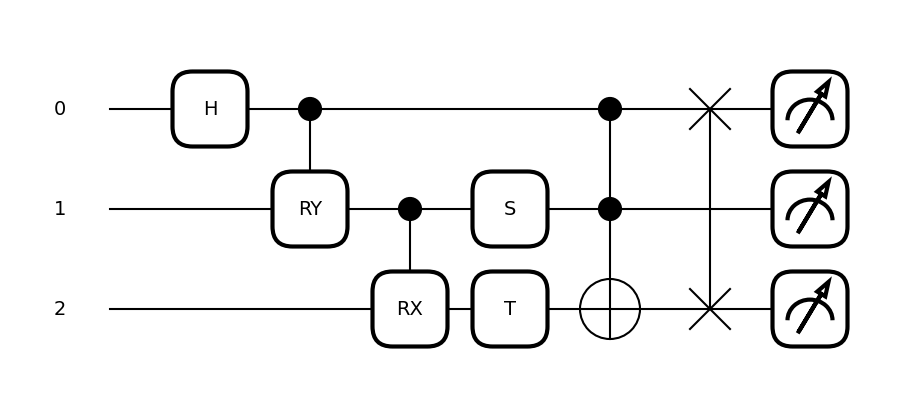

In [ ]:
### Insert your code here!

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def multi_qubit_gates(theta,phi):
    qml.Hadamard(wires=0)
    qml.CRY(phi, wires=[0,1])
    qml.CRX(theta, wires=[1,2])
    qml.S(wires=1)
    qml.T(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.SWAP(wires=[0,2])

    return qml.state()

qml.drawer.use_style("black_white")
qml.drawer.draw_mpl(multi_qubit_gates)(theta=np.pi, phi=np.pi)

## Measurements

Measurements in PennyLane are special. They’re flexible, allowing you to perform measurements on simulators or actual quantum hardware–and they’re varied, allowing you to customize your quantum algorithms to your specific needs. Let’s look into different PennyLane measurements and how you can use them to your advantage.

In PennyLane, we implement measurement as follows:

In [ ]:
dev = qml.device("default.qubit", wires = 2, shots =1)

@qml.qnode(dev)
def simple_circuit():
    qml.PauliX(1)
    return my_measurement # Replace with a PennyLane measurement

One could put one of the following Pennylane measurement in place of `my_measurement` in the block above.
*  `qml.sample()`: **For drawing samples** When running experiments on quantum device we often take samples. We specify a number of shots which indicates how many times we run the circuit and hence how many samples we obtain.
*  `qml.counts()`: **For taking counts** However, sometimes we have hundreds or thousands of shots, and we are likely only interested in the number of occurrences (or counts) for each possible measurement outcome. In this situation, use this.
*  `qml.probs()`: **For calculating probability distribution** Although we can obtain the probabilities of a specific observable with samples and counts, sometimes one need the exact measurement outcome probability distribution and in this case one can use this to calculate probabilities analytically.
*  `qml.expval()`: **For calculating expectation values** Expectation values are probably the most used type of measurement, especially for optimization and machine learning since they give useful information about the state and they’re differentiable.

For more details about Pennylane measurement, please see https://docs.pennylane.ai/en/stable/introduction/measurements.html.

**Exercise 1:** Create a circuit on two qubits in a linear array that flips qubit 0 and not qubit 1, and then try to measure them both with `qml.sample()`, `qml.counts()`, and `qml.probs()`.

What measurement outcome do you expect?

Simulate the circuit and see if the results match your expectations.

*Tip:* You might find the gate `qml.X` or `qml.PauliX` useful.

In [ ]:
dev = qml.device("default.qubit", wires = 2, shots =10)

@qml.qnode(dev)
def simple_circuit():
    qml.PauliX(1)
    return qml.counts()

simple_circuit()

{'01': array(10)}

**Exercise 2:** Create a circuit to prepare $|+\rangle^{\otimes 2}$, and then try to measure the expectation value of operator $X_0\otimes X_1$ and $Z_0\otimes Z_1$ using `qml.expval()`.

In [ ]:
### Insert your code here!

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit_expval():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.expval(qml.PauliX(0)@qml.PauliX(1)), qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

circuit_expval()

(array(1.), array(0.))

**Exercise 3:** Construct a circuit for preparing one of the Bell state $\frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$. Measure each qubit in the computational basis for 100 shots, and return the counts of 0 and 1 for each qubit respectively.

In [ ]:
### Insert your code here!

dev = qml.device("default.qubit", wires = 2, shots=100)

@qml.qnode(dev)
def circuit_bell():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.counts(wires=0), qml.counts(wires=1)

circuit_expval()


({'0': array(42), '1': array(58)}, {'0': array(42), '1': array(58)})

The above works, but the correlation information that characterise the Bell state is no longer present in the counts, as we do not see whether each 0 from the first wire corresponds to a 0 in the second. However, Pennylane does store this information. To recover it, we can use `qml.counts()` to see that there is no instances of '01' or '10' (Replace the measurement with `qml.counts()` in the circuit above).

In [ ]:
### Insert your code here!

dev = qml.device("default.qubit", wires = 2, shots=100)

@qml.qnode(dev)
def circuit_bell():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.counts()

circuit_expval()

{'00': array(41), '11': array(59)}

In Pennylane, we can also do the same with an observable specified. Try to measure $X_0 \otimes X_1$ using `qml.PauliX` like before, we expect all outcomes to be 1, which indeed happens.

In [ ]:
### Insert your code here!

dev = qml.device("default.qubit", wires = 2, shots=100)

@qml.qnode(dev)
def circuit_bell():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.counts(qml.PauliX(0)@qml.PauliX(1)))


{1.0: array(100)}

In Pennylane, we can also return the quantum state in the computational basis using `qml.state()`. Try to return `qml.state()` using the same circuit as before. The returned array is in lexicographic order.

Recall that in the computational basis, the Bell state takes the form $\frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$.

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit_bell():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()

circuit_bell()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

# Parametrizing a quantum circuit
In order to prove that our Bell state is a Bell state without cheating, we need to perform measurement in multiple bases. This is a great time to investigate parametrized quantum circuits.

A parametrized quantum circuit is one where one or more gates have free variables to be specified at run-time. This allows for a classical script to treat the call to a quantum computer as a black box with free input variables, and, for instance, optimize over the output. This is a key idea in NISQ algorithms, which you will encounter next week in the lecture and tutorial.

## Declaring a parametrized circuit as a function

To construct our parametrized circuit, we will define a quantum function which takes the parameters as an input, and returns the desired cost function.
We will construct a parametrized circuit that allows to measure the second qubit of the bell state we prepared above in an arbitrary basis (on the ZX plane), while the first one is always measured in the Z basis.

The gate that we are going to parameterize is a Y rotation on qubit 1
$$R_y(\theta) = e^{-i\theta/2 Y_0}=\left(\begin{array}{cc}\cos(\theta/2) & -\sin(\theta/2)\\ \sin(\theta/2) &\cos(\theta/2)\end{array} \right). $$
This rotates between the X and Z axis on qubit 1 as $\theta$ runs from $0\rightarrow\pi$, which means that at a measurement of the state $R_y(\theta)|\Psi\rangle$ in the Z (computational) basis is equivalent to a measurement of $|\Psi\rangle$ in the $\cos(\theta/2) Z - \sin(\theta/2) X$ basis. In most physical implementations of quantum devices, direct measurement along more than 1 axis is not possible, but the above is very cost-effective to implement.

Note that in the code below, we have to make not one, but two calls to generate the rotation gate. The first call fixes the angle to our parameter, whilst the second fixes which qubits the gate acts upon.

In [ ]:
dev = qml.device("default.qubit", wires = 2, shots=100)

@qml.qnode(dev)
def circuit_bell_pqc(theta):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(theta, wires=1)
    return qml.counts()

## Visualizing the parametrized circuit

To visualize your circuit with Pennylane, we can define a *drawer* using `qml.draw()`. This module provides the circuit drawing functionality used to display circuits visually. For more information, check https://docs.pennylane.ai/en/stable/code/qml_drawer.html.

(<Figure size 600x300 with 1 Axes>, <Axes: >)

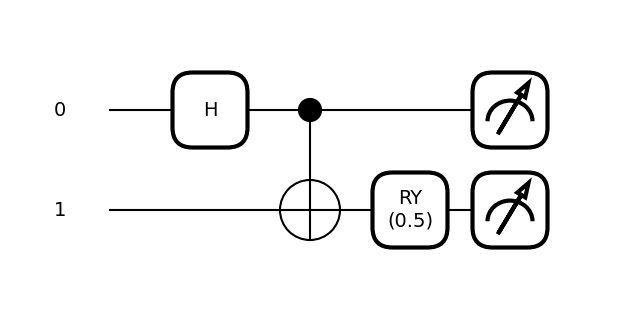

In [ ]:
qml.drawer.use_style("black_white")
qml.drawer.draw_mpl(circuit_bell_pqc, decimals=1)(0.5)

## Circuits as functions

In Pennylane, quantum circuits are used as mathematical models, or functions. This means we can get creative and do anything with quantum circuit we can usually only do with functions. Having defined the parametrized circuit as a function, we can directly call the function with a numeric parameter value.

In [ ]:
print('Bell state Phi+, 100 measurements in the Z0, Z1 basis:')
dev = qml.device("default.qubit", wires = 2, shots = 100)
print(qml.QNode(circuit_bell_pqc, dev)(theta=0))

print('Bell state Phi+, 100 measurements in the Z0, X1 basis:')
dev = qml.device("default.qubit", wires = 2, shots = 100)
print(qml.QNode(circuit_bell_pqc, dev)(theta=np.pi/2))

Bell state Phi+, 100 measurements in the Z0, Z1 basis:
{'00': 49, '11': 51}
Bell state Phi+, 100 measurements in the Z0, X1 basis:
{'00': 26, '01': 23, '10': 17, '11': 34}


With theta set to $\pi/2$, we are measuring our Bell state in two uncorrelated bases, and we expect the results to be similarly uncorrelated.
To make a completely convincing proof, let us study the correlation between our measurements as we rotate $\theta$.

In [ ]:
dev = qml.device("default.qubit", wires = 2, shots=100)

@qml.qnode(dev)
def circuit_bell_pqc(theta):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(theta, wires=1)
    return qml.sample()

def correlation_function(theta):
    samples = circuit_bell_pqc(theta)
    correlation = []
    for i in range(len(samples)):
        correlation.append( 1 - (samples[i][0] ^ samples[i][1]) )
        # Return 1 when the measurements of two qubits are the same, i.e. correlated measurement
    return {'0': correlation.count(0), '1': correlation.count(1) }

correlation_function(theta=np.pi/2) # Try different theta and see what happens

{'0': 47, '1': 53}

## Sweeps

A sweep is simply an iteration over a set of parameters (in the same way that one would run a for loop in classical code). We implement this using `numpy.linspace` to define the values of $\theta$ that we want to test.

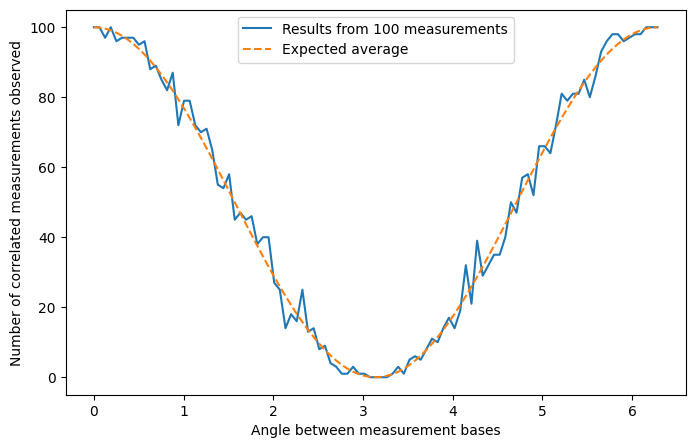

In [ ]:
# Sweeps
theta_sweep = np.linspace(0, 2*np.pi, 101)

results = np.array([correlation_function([t]) for t in theta_sweep])

correlations = [result['1'] for result in results] # Number of correlated measurements as a function of theta

# Let's plot the results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))
plt.plot(theta_sweep, correlations, label='Results from 100 measurements')
plt.xlabel('Angle between measurement bases', fontsize=10)
plt.ylabel('Number of correlated measurements observed', fontsize=10)
plt.plot(theta_sweep, 50 * (np.cos(theta_sweep) + 1), '--',
         label='Expected average')
plt.legend(fontsize=10)

We see that the resulting curve has quite some sampling noise, but it follows the expected value.

**Exercise 4:** extend the above experiment to demonstrate that if qubit 0 is rotated by $R_y(\theta_0)$ and qubit 1 is rotated by $R_y(\theta_1)$ prior to measurement, the correlation between measurements is independent of $\theta_0-\theta_1$.

Text(0, 0.5, 'Measurement basis angle for second qubit $\\theta_1$')

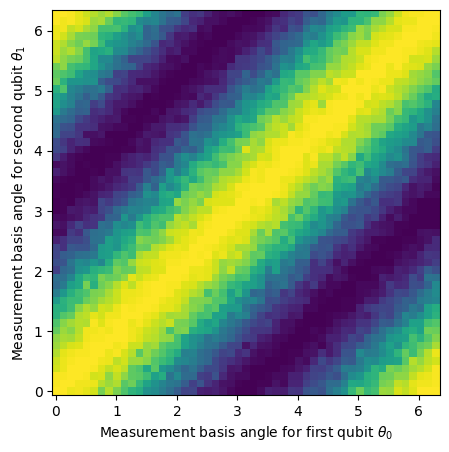

In [ ]:
### Insert your code here!

dev = qml.device("default.qubit", wires = 2, shots=100)

@qml.qnode(dev)
def circuit_bell_pqc(theta0, theta1):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(theta0, wires=0)
    qml.RY(theta1, wires=1)
    return qml.sample()

def correlation_function(theta0, theta1):
    samples = circuit_bell_pqc(theta0, theta1)
    correlation = []
    for i in range(len(samples)):
        correlation.append( 1 - (samples[i][0] ^ samples[i][1]) )
        # Return 1 when the measurements of two qubits are the same, i.e. correlated measurement
    return correlation.count(1)

# Sweeps for both theta0 and theta1
theta0_sweep = np.linspace(0, 2 * np.pi, 51)
theta1_sweep = np.linspace(0, 2 * np.pi, 51)

# Create a meshgrid for theta0_sweep and theta1_sweep
theta0_grid, theta1_grid = np.meshgrid(theta0_sweep, theta1_sweep)
correlations = np.array([correlation_function(t0, t1) for t0, t1 in zip(theta0_grid.ravel(), theta1_grid.ravel())])
correlations = correlations.reshape(theta0_grid.shape) # Reshape the results array back into a 2D array

# Let's plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pcolormesh(theta0_sweep, theta1_sweep, correlations)
# plt.plot(theta0_sweep+theta1_sweep, correlations)
plt.xlabel(r'Measurement basis angle for first qubit $\theta_0$', fontsize=10)
plt.ylabel(r'Measurement basis angle for second qubit $\theta_1$', fontsize=10)


# Quantum teleportation
One of the most famous quantum effects is that of teleportation, where the state from one qubit may be transmitted to the state of another qubit non-locally. Details of this may be found on Wikipedia, or in Nielsen and Chuang.

To begin, we need to prepare a Bell state on two qubits, and prepare a state to be teleported.

**Exercise 5:** Create a three-qubit circuit on a linear array that performs an arbitrary $R_y(\theta)$ rotation on qubit 0, and that prepares a Bell state on qubits 1 and 2. Visualize the circuit.

In [ ]:
### Insert your code here!

def preparation_pqc(theta):
   '''
   '''

The teleportation circuit requires entangling qubit 0 and 1 via a CNOT gate, then reading qubit 0 in the X basis and qubit 1 in the Z basis.
The output of these two measurements will be used to control the application of future quantum gates on qubit 2.
This is known as mid-circuit measurement, and such mid-circuit measurements are expressed in PennyLane using `qml.measure`.

**Exercise 6:** Regard the circuitry above as a subcircuit. Write it as a quantum function (use mid-circuit measurement), and put it together with the circuit you wrote in Exercise 5.
Visualize the result with a symbolic parameter.

*Note: In Pennylane, Quantum functions that do not return anything can be used as subcircuits—smaller pieces that build up to a larger circuit.

In [ ]:
### Insert your code here!


The final part of the teleportation circuit requires performing single qubit rotations on qubit 2, depending on the output of the two mid-circuit measurements.
The mid-circuit measurements results can be used to control operations, and it is expressed in PennyLane using `qml.cond` (see https://docs.pennylane.ai/en/stable/code/api/pennylane.cond.html).

(Note that the correction gates can also be controlled by the post-measurement state of the qubit 0 and 1 instead of classically by the measurement result. You can also try to use `qml.CX` and `qml.CZ` to finish the circuit!)

(<Figure size 900x500 with 1 Axes>, <Axes: >)

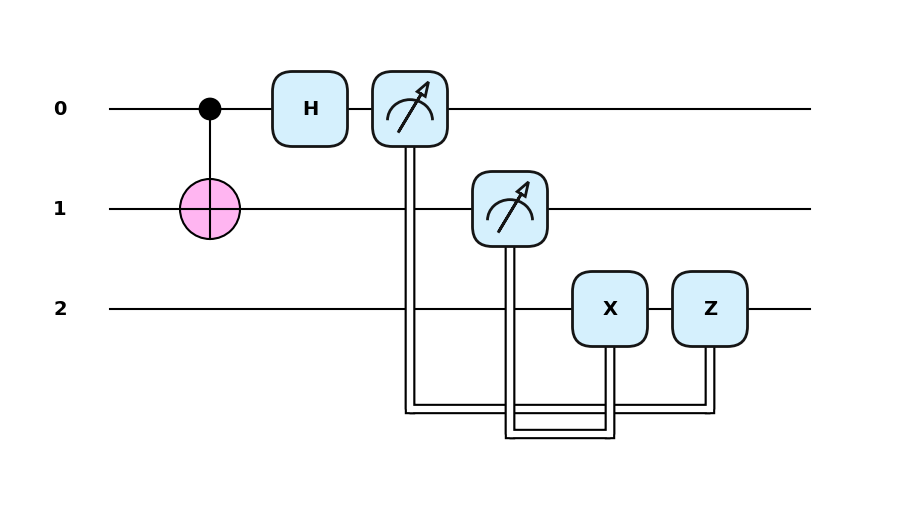

In [ ]:
def mid_measurement_and_correction():
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0) # To effectively measure qubit 0 in the X basis
    m0 = qml.measure(wires=0) # Measure the first qubits using mid-circuit measurement
    m1 = qml.measure(wires=1) # Measure the second qubits mid-circuit measurement

    qml.cond(m1, qml.PauliX)(wires=2)
    qml.cond(m0, qml.PauliZ)(wires=2)


# Combine the subcircuits togther
dev = qml.device("default.qubit", wires = 3)
@qml.qnode(dev)
def full_teleportation_circuit(theta):
    preparation_pqc(theta)
    mid_measurement_and_correction()

qml.drawer.use_style(style='pennylane')
qml.drawer.draw_mpl(full_teleportation_circuit)(0)

To test the teleportation, let us check the result of measuring qubit 2 in the Z basis as we change the prepared state by altering the angle $\theta$.

**Exercise 7:** Add a measurement of qubit 2 in the Z basis using `qml.sample()`, and plot the result of these measurements as you sweep over $\theta$.

In [ ]:
### Insert your code here!

